In [74]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [75]:
# files
#!ls ../input/the-depression-dataset/data

In [76]:
data_path = ''

<a id='1'></a>
# Explore Score File

In [77]:
# load score file
df = pd.read_csv('scorestry.csv')

In [78]:
# show file (it's quite small so it can be displayed at once)
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [79]:
# add difference of scores ("after activity recording" minus "before activity recording")
df['DeltaMADRS'] = df.madrs2 - df.madrs1

#### Control rows have empty columns except for number (id), days, gender and age. Therefore let's split between condition and control observations.

In [80]:
# split in condition and control table
df_condition = df[df.number.str.contains('condition')].copy()
df_control = df[df.number.str.contains('control')].copy()

<a id='2'></a>
# Clean / Explore Condition Table

In [81]:
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1.0,2.0,2.0,11-15,2.0,1.0,24.0,25.0,1.0
7,condition_8,5,2,25-29,2.0,2.0,2.0,11-15,1.0,2.0,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,0.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,-7.0


In [82]:
df_condition.shape

(23, 13)

In [83]:
# define standard text for missing values
txt_missing = '_MISSING_'

In [84]:
# prep melanch column
df_condition.melanch = df_condition.melanch.fillna(txt_missing)
df_condition.melanch = df_condition.melanch.astype('category') # convert to categorical
df_condition.melanch = df_condition.melanch.cat.rename_categories({-1 : txt_missing,
                                                                   1.0 : '1',
                                                                   2.0 : '2'})

# age, gender => category
df_condition.age = df_condition.age.astype('category')
df_condition.gender = df_condition.gender.astype('category')

# further type conversions (float => int => category)
df_condition.afftype = df_condition.afftype.astype(int).astype('category')
df_condition.inpatient = df_condition.inpatient.astype(int).astype('category')
df_condition.marriage = df_condition.marriage.astype(int).astype('category')
df_condition.work = df_condition.work.astype(int).astype('category')

# imputation
df_condition.edu = df_condition.edu.astype('category')
df_condition.edu = df_condition.edu.cat.rename_categories({' ' : txt_missing})

In [85]:
# let's check the cleaned data set
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,1.0
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0
5,condition_6,7,1,35-39,2,2,2,6-10,1,2,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1,2,2,11-15,2,1,24.0,25.0,1.0
7,condition_8,5,2,25-29,2,2,2,11-15,1,2,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1,2,2,6-10,1,2,26.0,26.0,0.0
9,condition_10,9,2,45-49,2,2,2,6-10,1,2,28.0,21.0,-7.0


In [86]:
# define numerical and categorical features
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

## Numerical Features

In [87]:
# basic stats
df_condition[features_num].describe()

,days,madrs1,madrs2,DeltaMADRS
count,23.000000,23.000000,23.000000,23.000000
mean,12.652174,22.739130,20.000000,-2.739130
std,2.773391,4.797892,4.729021,3.968253
min,5.000000,13.000000,11.000000,-13.000000
25%,12.500000,18.500000,16.000000,-5.000000
50%,13.000000,24.000000,21.000000,-3.000000
75%,14.000000,26.000000,24.500000,0.000000
max,18.000000,29.000000,28.000000,4.000000


#### Development of MADRS score (before activity recording / after activity recording):

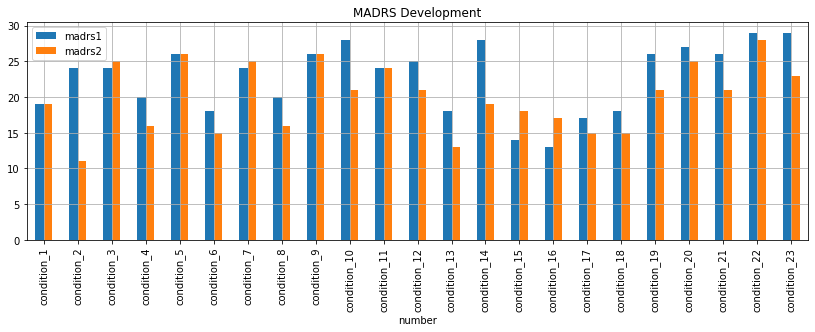

In [88]:
# barplot of MADRS scores (before/after)
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
df_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

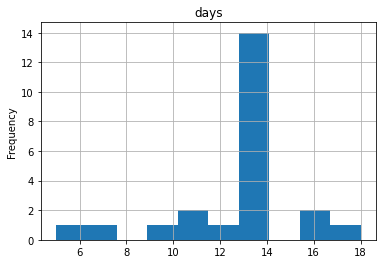

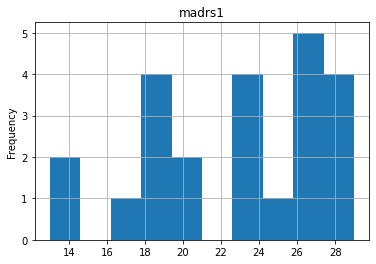

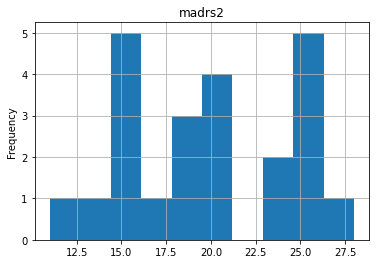

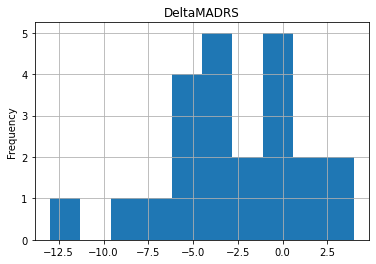

In [89]:
# plot distributions of numerical features
for f in features_num:
    df_condition[f].plot(kind='hist')
    plt.title(f)
    plt.grid()
    plt.show()

### Correlations

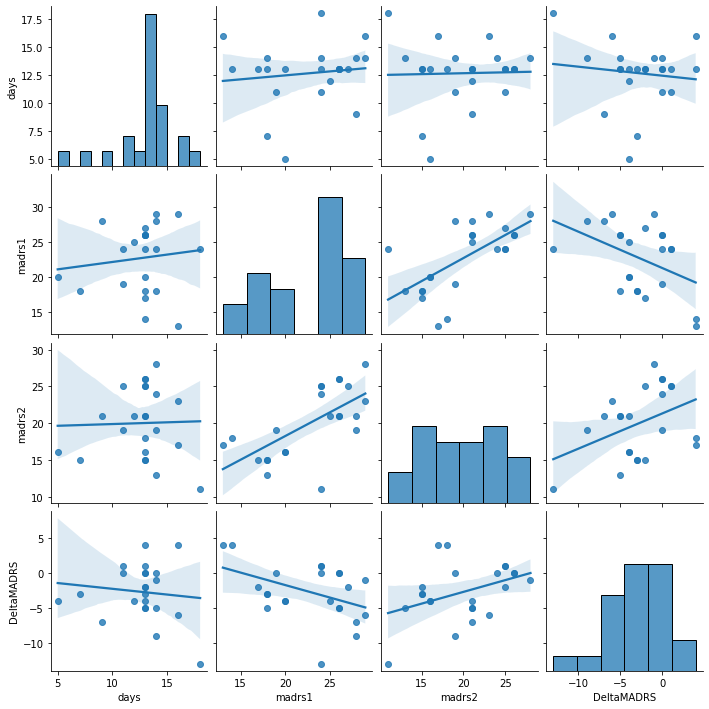

In [90]:
# scatter plot for each pair incl. regression line
sns.pairplot(df_condition[features_num], kind='reg')
plt.show()

In [91]:
# correlation matrix
df_condition[features_num].corr(method='pearson')

,days,madrs1,madrs2,DeltaMADRS
days,1.000000,0.122678,0.027726,-0.115285
madrs1,0.122678,1.000000,0.653090,-0.430772
madrs2,0.027726,0.653090,1.000000,0.402082
DeltaMADRS,-0.115285,-0.430772,0.402082,1.000000


## Categorical Features

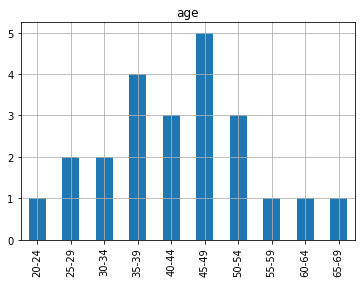

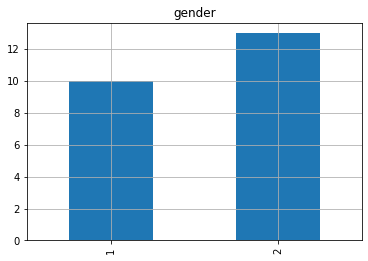

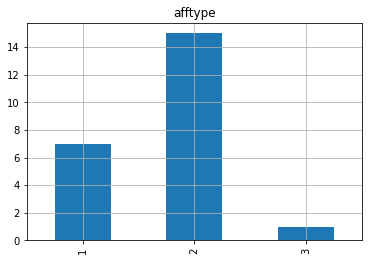

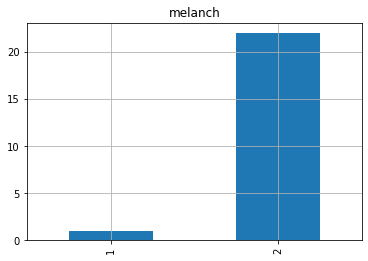

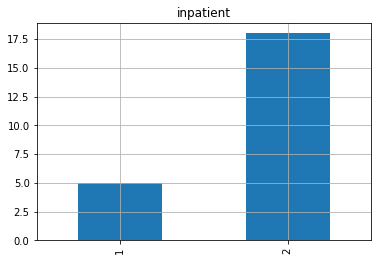

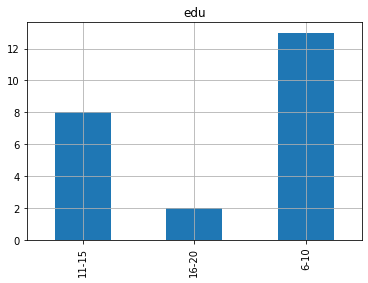

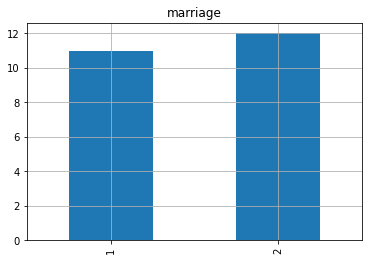

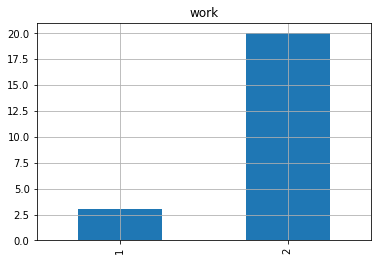

In [92]:
# plot distributions of categorical features
for f in features_cat:
    df_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

### Impact of categorical features on scores

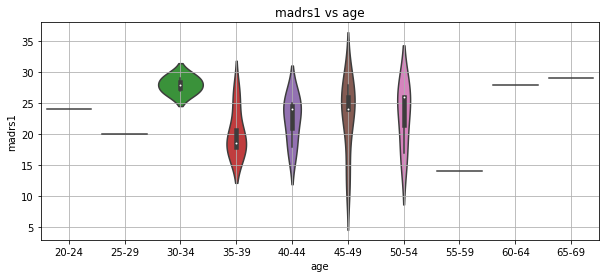

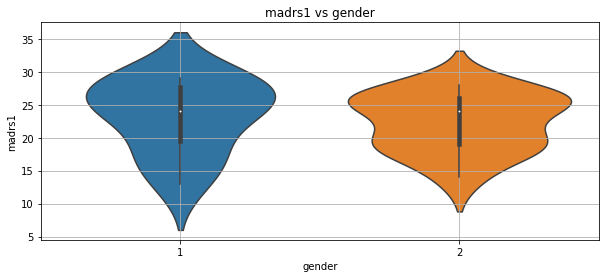

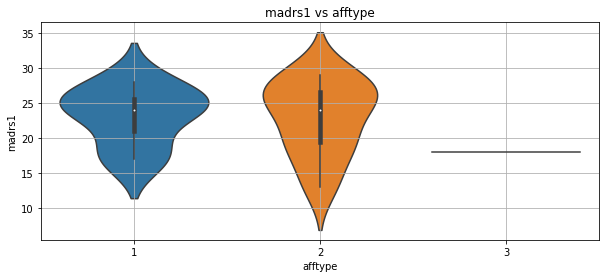

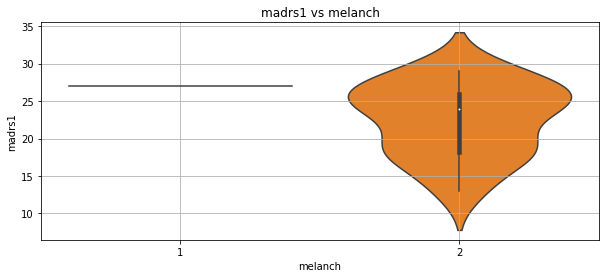

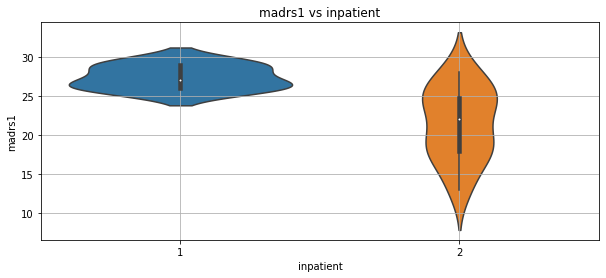

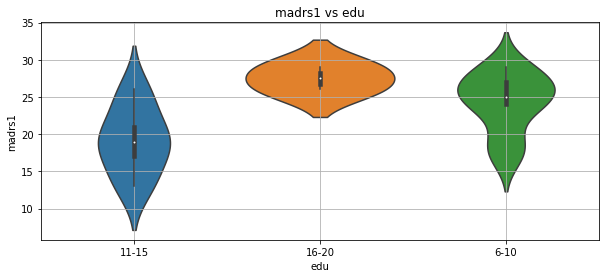

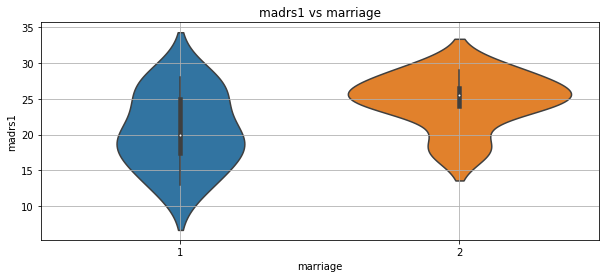

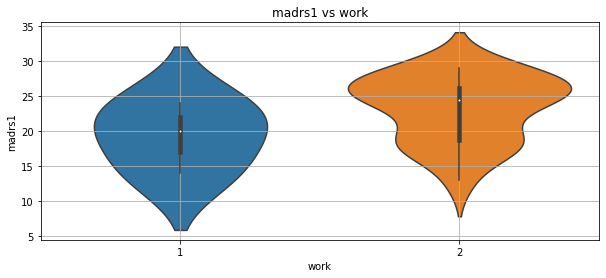

In [93]:
# impact of feature on score madrs1 (at begin of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

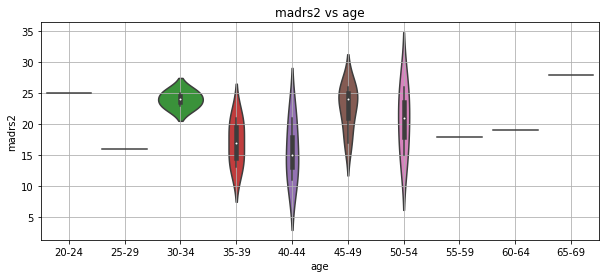

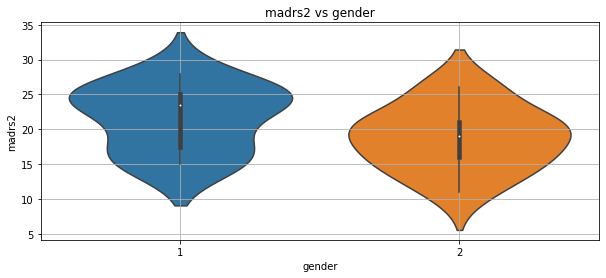

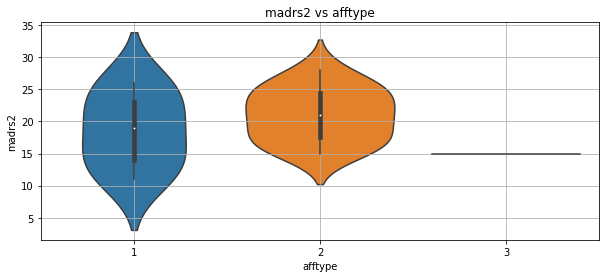

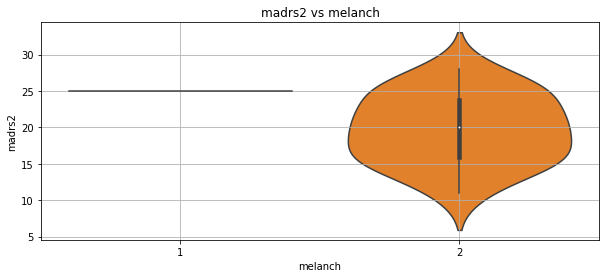

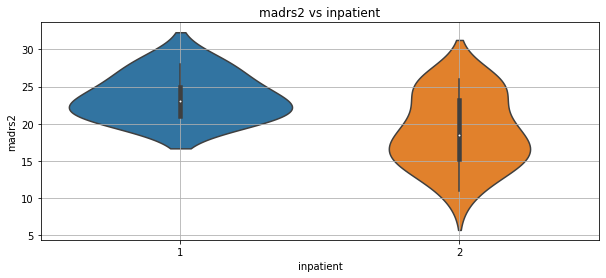

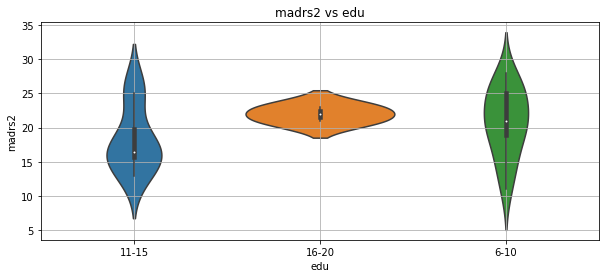

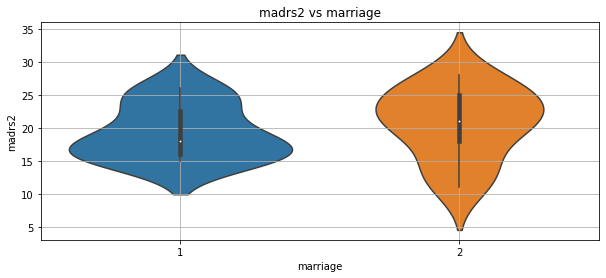

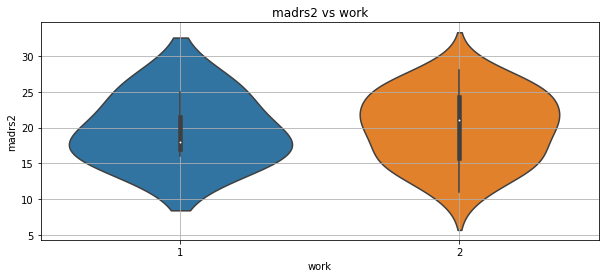

In [94]:
# impact of feature on score madrs2 (at end of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()

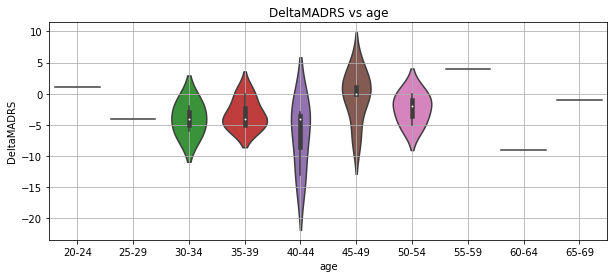

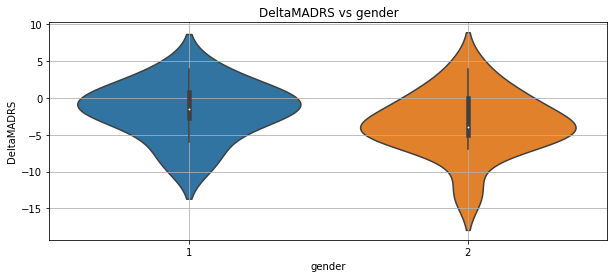

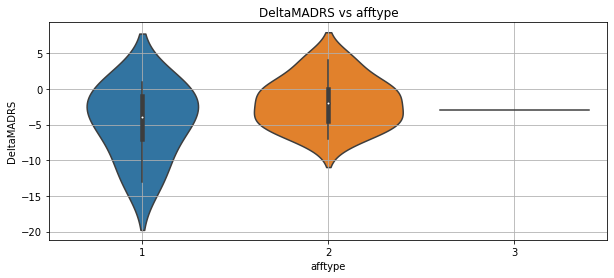

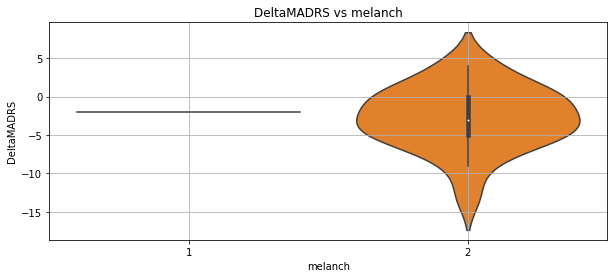

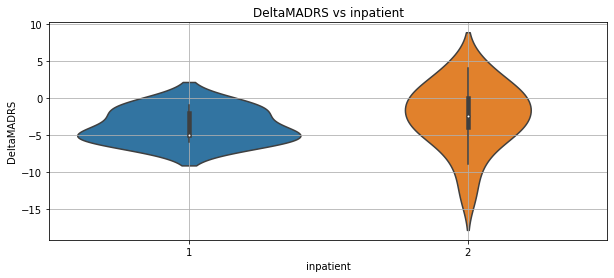

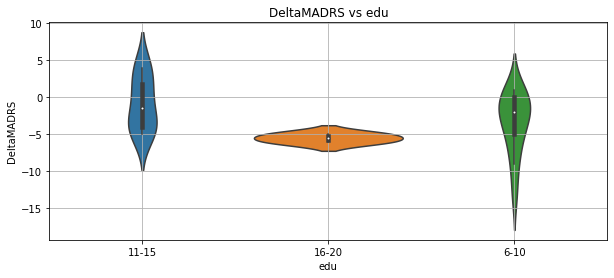

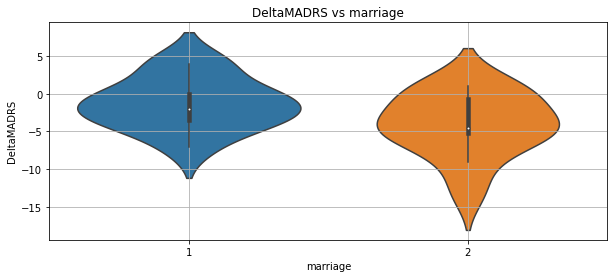

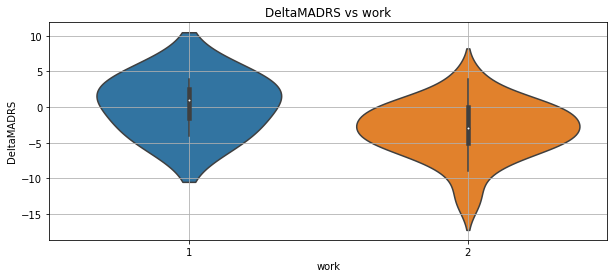

In [95]:
# impact of feature on score difference DeltaMADRS = madrs2 - madrs1
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='DeltaMADRS')
    plt.title('DeltaMADRS vs ' + f)
    plt.grid()
    plt.show()

<a id='3'></a>
# Explore Control Table

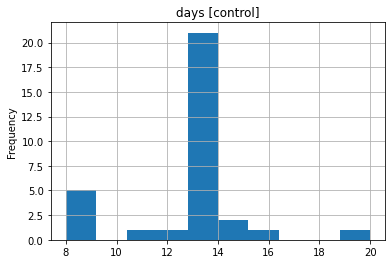

In [96]:
# distribution of days
df_control.days.plot(kind='hist')
plt.title('days [control]')
plt.grid()
plt.show()

In [97]:
# type conversion
df_control.age = df_control.age.astype('category')
df_control.gender = df_control.gender.astype('category')

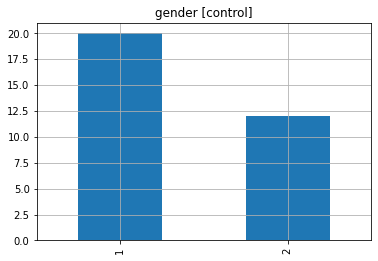

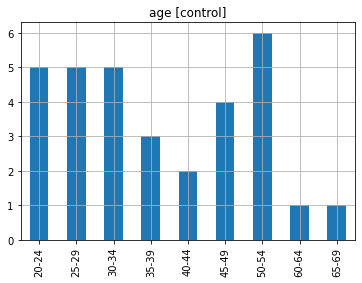

In [98]:
# plot distributions of categorical features
df_control.gender.value_counts().sort_index().plot(kind='bar')
plt.title('gender [control]')
plt.grid()
plt.show()

df_control.age.value_counts().sort_index().plot(kind='bar')
plt.title('age [control]')
plt.grid()
plt.show()

<a id='4'></a>
# Activity Data - Exploration

In [99]:
# load a specific file
my_file = 'condition/condition_1.csv'
df_act = pd.read_csv(my_file)
df_act.head(10)

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
5,2003-05-07 12:05:00,2003-05-07,160
6,2003-05-07 12:06:00,2003-05-07,17
7,2003-05-07 12:07:00,2003-05-07,646
8,2003-05-07 12:08:00,2003-05-07,978
9,2003-05-07 12:09:00,2003-05-07,306


In [100]:
# dimensions
df_act.shape

(23244, 3)

In [101]:
# basic stats of activity
df_act.activity.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    23244.000000
mean       146.948030
std        294.592424
min          0.000000
1%           0.000000
10%          0.000000
25%          0.000000
50%          9.000000
75%        172.000000
90%        469.000000
99%       1300.000000
max       3526.000000
Name: activity, dtype: float64

In [102]:
# add logarithmic version of activity
df_act['log1_act'] = np.log10(1+df_act.activity)

# add non-zero indicator for activity
df_act['non_zero'] = (df_act.activity>0).astype(int)

### Distribution

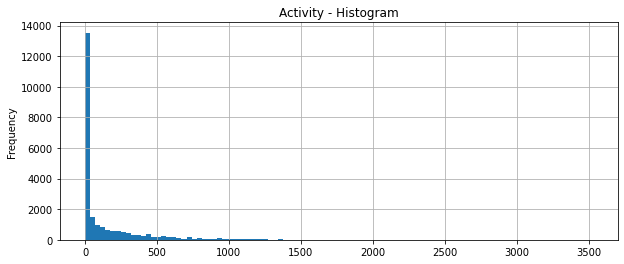

In [103]:
# distribution of activity
plt.figure(figsize=(10,4))
df_act.activity.plot(kind='hist', bins=100)
plt.title('Activity - Histogram')
plt.grid()
plt.show()

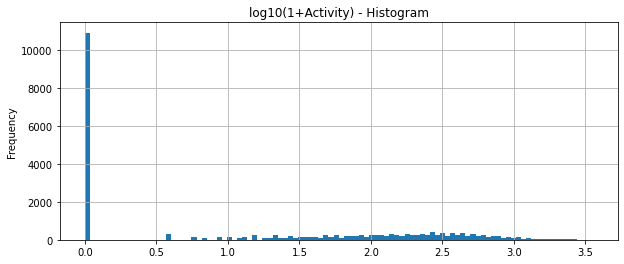

In [104]:
# distribution of activity - log transformation
plt.figure(figsize=(10,4))
df_act.log1_act.plot(kind='hist', bins=100)
plt.title('log10(1+Activity) - Histogram')
plt.grid()
plt.show()

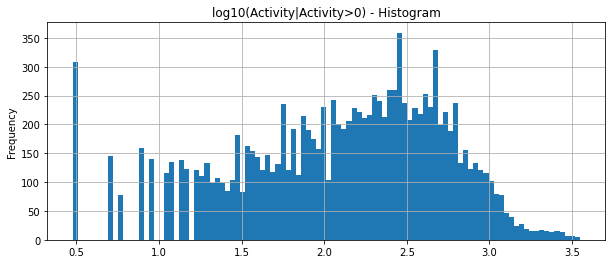

In [105]:
# distribution of activity - log transformation - non zeroes only
plt.figure(figsize=(10,4))
np.log10(df_act[df_act.non_zero==1].activity).plot(kind='hist', bins=100)
plt.title('log10(Activity|Activity>0) - Histogram')
plt.grid()
plt.show()

### Time Series

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


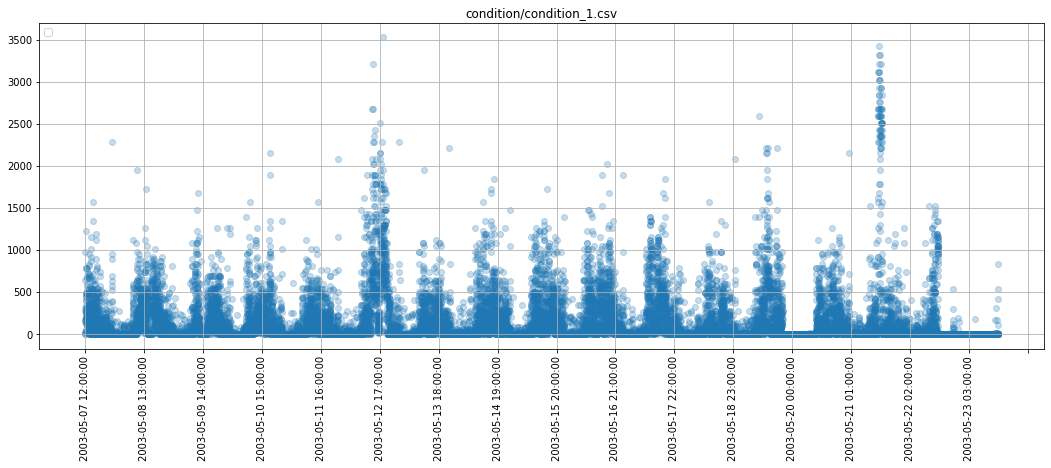

In [106]:
# plot full activity time series
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_act.timestamp, df_act.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


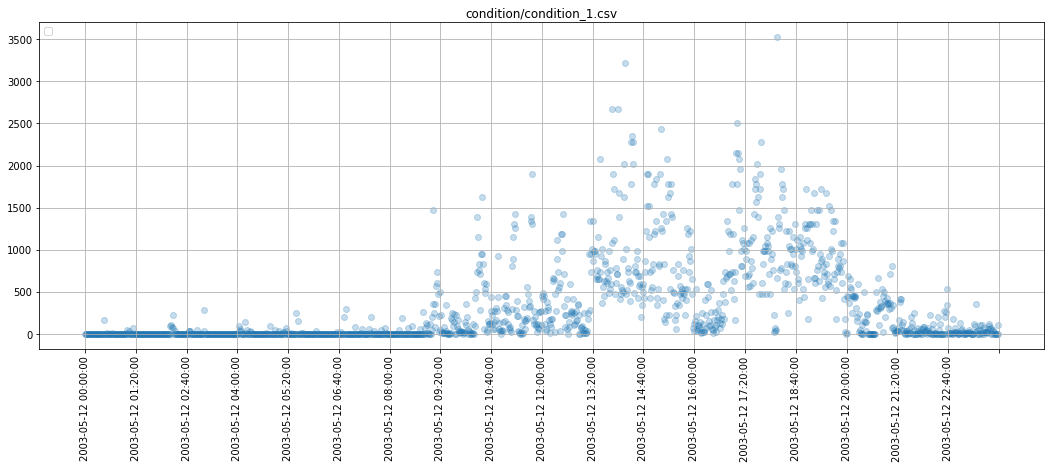

In [107]:
# zoom into a specific day
df_act_zoom = df_act[df_act.date=='2003-05-12']
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_act_zoom.timestamp, df_act_zoom.activity, alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

### Evaluate by Date

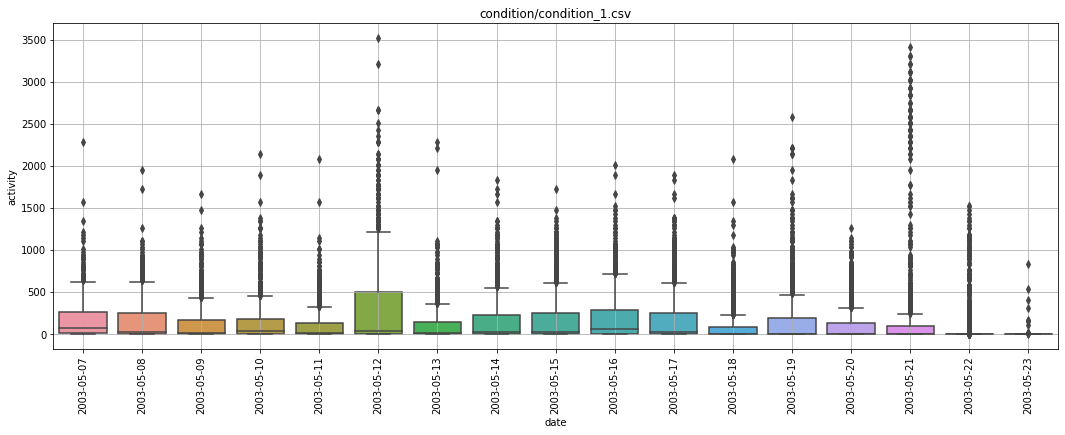

In [108]:
# group activity by date
plt.subplots(figsize=(18,6))
sns.boxplot(data=df_act, x='date', y='activity')
plt.xticks(rotation=90)
plt.title(my_file)
plt.grid()
plt.show()

In [109]:
# group by date
df_act_by_date = df_act.groupby(['date'], as_index=False).agg(
    n = pd.NamedAgg(column='activity', aggfunc='count'),
    n_non_zero = pd.NamedAgg(column='non_zero', aggfunc='sum'),
    mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
    q75_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=75)),
    q90_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=90)),
    q95_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=95)),
    q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
    max_act = pd.NamedAgg(column='activity', aggfunc='max'))

df_act_by_date

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
0,2003-05-07,720,573,174.144444,259.00,485.0,667.0,1003.92,2284
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.00,1954
2,2003-05-09,1440,775,124.135417,172.00,398.0,587.0,948.00,1672
3,2003-05-10,1440,901,134.961806,184.00,411.0,587.0,1097.35,2146
4,2003-05-11,1440,835,99.439583,134.00,328.0,469.0,759.00,2080
5,2003-05-12,1440,873,316.874306,500.00,1010.0,1384.0,2055.04,3526
6,2003-05-13,1440,770,108.475694,148.00,361.0,469.0,879.08,2284
7,2003-05-14,1440,869,155.684722,227.00,469.0,667.0,1182.00,1836
8,2003-05-15,1440,864,170.877083,250.00,533.0,759.0,1146.00,1725
9,2003-05-16,1440,948,190.508333,288.50,568.0,759.0,1167.96,2016


#### The first and the last day in this example are incomplete. For the sake of comparability we will remove those incomplete days!

In [110]:
# remove incomplete days from stats
df_act_by_date = df_act_by_date[df_act_by_date.n==1440] # 1440 = 24*60 minutes in a day
df_act_by_date

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.00,1954
2,2003-05-09,1440,775,124.135417,172.00,398.0,587.0,948.00,1672
3,2003-05-10,1440,901,134.961806,184.00,411.0,587.0,1097.35,2146
4,2003-05-11,1440,835,99.439583,134.00,328.0,469.0,759.00,2080
5,2003-05-12,1440,873,316.874306,500.00,1010.0,1384.0,2055.04,3526
6,2003-05-13,1440,770,108.475694,148.00,361.0,469.0,879.08,2284
7,2003-05-14,1440,869,155.684722,227.00,469.0,667.0,1182.00,1836
8,2003-05-15,1440,864,170.877083,250.00,533.0,759.0,1146.00,1725
9,2003-05-16,1440,948,190.508333,288.50,568.0,759.0,1167.96,2016
10,2003-05-17,1440,853,177.760417,250.00,587.0,835.0,1205.79,1894


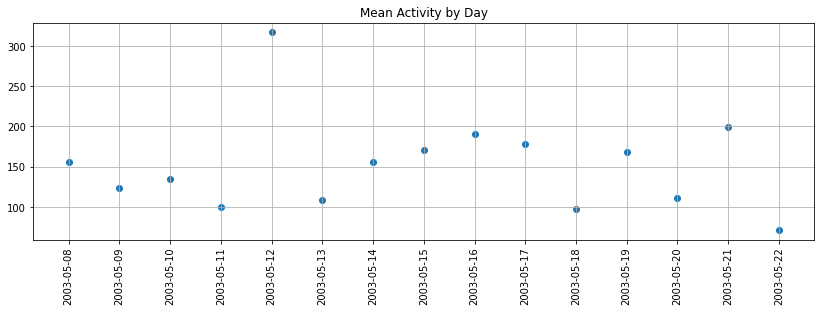

Mean of daily means: 152.2
Stdev of daily means: 59.22


In [111]:
# plot mean activity by day
plt.figure(figsize=(14,4))
plt.scatter(df_act_by_date.date, df_act_by_date.mean_act)
plt.title('Mean Activity by Day')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print('Mean of daily means:', np.round(df_act_by_date.mean_act.mean(),2))
print('Stdev of daily means:', np.round(df_act_by_date.mean_act.std(),2))

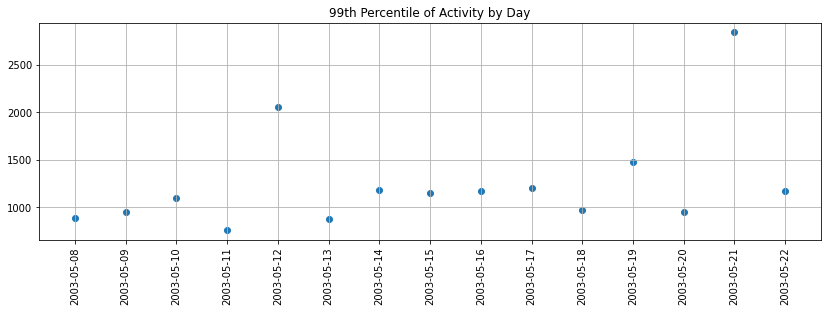

Mean of daily 99th percentile: 1248.37
Stdev of daily 99th percentile: 537.75


In [112]:
# plot 99th percentile of activity by day
plt.figure(figsize=(14,4))
plt.scatter(df_act_by_date.date, df_act_by_date.q99_act)
plt.title('99th Percentile of Activity by Day')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print('Mean of daily 99th percentile:', np.round(df_act_by_date.q99_act.mean(),2))
print('Stdev of daily 99th percentile:', np.round(df_act_by_date.q99_act.std(),2))

<a id='5'></a>
# Loop over files and extract info

## Condition

In [113]:
# show all condition files
!ls ../input/the-depression-dataset/data/condition

'ls' is not recognized as an internal or external command,
operable program or batch file.


### Let's look at another example before automatically evaluating all files:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


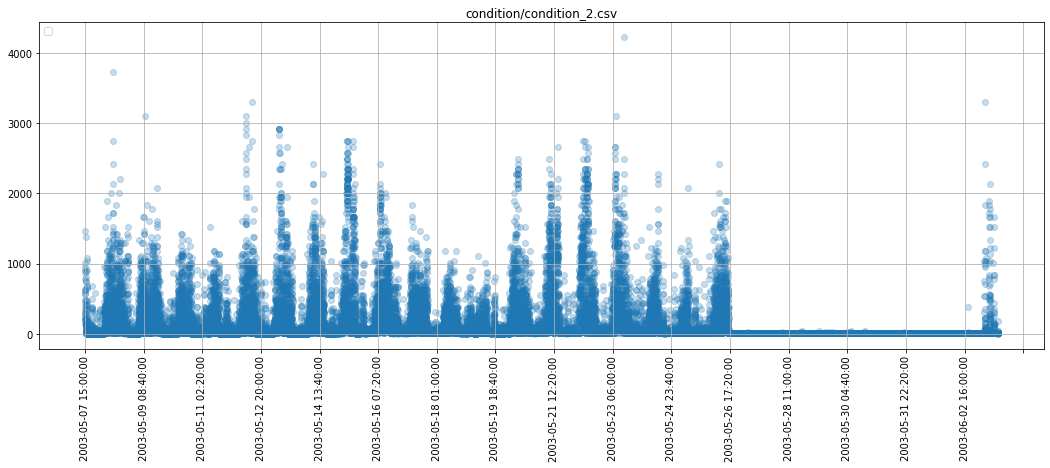

In [114]:
# load and plot full activity time series
my_file = 'condition/condition_2.csv'
df_temp = pd.read_csv(my_file)

my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_temp.timestamp, df_temp.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
ax.legend(loc='upper left')
plt.show()

### We observe a longer period (several days) where no/almost no activity is recorded. This does not seem reasonable (maybe the sensor was offline/not working properly in that phase). We will in the following remove days showing such extremely low activity.

In [115]:
# define (daily mean) threshold below which we consider the data as not usable
daily_threshold = 10

In [116]:
# iterate over all files and extract statistics 
mean_list = []
std_list = []
q99_list = []
std_q99_list = []

for i in range(23):
    j = 1+i
    my_file = data_path + 'condition/condition_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)
    
    # group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
        mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    # remove incomplete days (24*60 minutes = 1440)
    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # remove days with unreasonable low average daily activity
    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]
    
    print(df_temp_by_date)
    print()
    
    # extract statistics
    mean_temp = df_temp_by_date.mean_act.mean() # mean of mean daily activity
    std_temp = df_temp_by_date.mean_act.std() # stdev of mean daily activity
    mean_q99_temp = df_temp_by_date.q99_act.mean() # mean of 99th percentiles of daily activity
    std_q99_temp = df_temp_by_date.q99_act.std() # stdev of 99th percentiles of daily activity
    
    # add results to lists
    mean_list.append(mean_temp)
    std_list.append(std_temp)
    q99_list.append(mean_q99_temp)
    std_q99_list.append(std_q99_temp)

Extracting from: condition/condition_1.csv
          date     n    mean_act  q99_act  max_act
1   2003-05-08  1440  156.247222   890.00     1954
2   2003-05-09  1440  124.135417   948.00     1672
3   2003-05-10  1440  134.961806  1097.35     2146
4   2003-05-11  1440   99.439583   759.00     2080
5   2003-05-12  1440  316.874306  2055.04     3526
6   2003-05-13  1440  108.475694   879.08     2284
7   2003-05-14  1440  155.684722  1182.00     1836
8   2003-05-15  1440  170.877083  1146.00     1725
9   2003-05-16  1440  190.508333  1167.96     2016
10  2003-05-17  1440  177.760417  1205.79     1894
11  2003-05-18  1440   97.729167   966.30     2080
12  2003-05-19  1440  168.102778  1474.00     2586
13  2003-05-20  1440  111.488194   948.00     1260
14  2003-05-21  1440  199.597222  2839.00     3418
15  2003-05-22  1440   71.112500  1167.96     1521

Extracting from: condition/condition_2.csv
          date     n    mean_act  q99_act  max_act
1   2003-05-08  1440  259.645139  1496.67     

In [117]:
# store results in data frame
condition_stats = pd.DataFrame(zip(df_condition.number, mean_list, q99_list, std_list, std_q99_list), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# add coefficient of variation (stdev / mean)
condition_stats['CV_MeanAct'] = condition_stats.Std_MeanAct / condition_stats.Mean_MeanAct
condition_stats['CV_Q99Act'] = condition_stats.Std_Q99Act / condition_stats.Mean_Q99Act
condition_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,152.199630,1248.365333,59.218240,537.750628,0.389083,0.430764
1,condition_2,211.280738,1538.777368,80.924414,528.810407,0.383018,0.343656
2,condition_3,280.810714,1605.270000,61.577770,287.349708,0.219286,0.179004
3,condition_4,286.064732,1710.240714,166.280241,609.340002,0.581268,0.356289
4,condition_5,172.622371,1300.538571,46.444164,259.816491,0.269051,0.199776
5,condition_6,194.754861,1428.765000,38.794611,153.984219,0.199197,0.107774
6,condition_7,295.975588,1651.887692,148.639974,401.224692,0.502203,0.242889
7,condition_8,200.443750,1804.810000,95.169158,745.719621,0.474792,0.413185
8,condition_9,177.031624,1420.541538,25.805786,151.907215,0.145769,0.106936
9,condition_10,296.403373,1691.552143,84.898469,256.541836,0.286429,0.151661


In [118]:
# look at correlation of different metrics
condition_stats.corr()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
Mean_MeanAct,1.000000,0.911266,0.755293,0.262670,0.213459,-0.214997
Mean_Q99Act,0.911266,1.000000,0.746642,0.453874,0.326929,-0.085445
Std_MeanAct,0.755293,0.746642,1.000000,0.587979,0.745768,0.156139
Std_Q99Act,0.262670,0.453874,0.587979,1.000000,0.592501,0.811374
CV_MeanAct,0.213459,0.326929,0.745768,0.592501,1.000000,0.373447
CV_Q99Act,-0.214997,-0.085445,0.156139,0.811374,0.373447,1.000000


## Control

In [119]:
# show all control files
!ls ../input/the-depression-dataset/data/control

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [120]:
# iterate over all files and extract statistics 
mean_list_control = []
std_list_control = []
q99_list_control = []
std_q99_list_control = []

for i in range(32):
    j = 1+i
    my_file = data_path + 'control/control_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)
    
    # group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
        mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    # remove incomplete days (24*60 minutes = 1440)
    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # remove days with unreasonable low average daily activity
    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]
    
    print(df_temp_by_date)
    print()
    
    # extract statistics
    mean_temp = df_temp_by_date.mean_act.mean() # mean of mean daily activity
    std_temp = df_temp_by_date.mean_act.std() # stdev of mean daily activity
    mean_q99_temp = df_temp_by_date.q99_act.mean() # mean of 99th percentiles of daily activity
    std_q99_temp = df_temp_by_date.q99_act.std() # stdev of 99th percentiles of daily activity

    # add results to lists
    mean_list_control.append(mean_temp)
    std_list_control.append(std_temp)
    q99_list_control.append(mean_q99_temp)
    std_q99_list_control.append(std_q99_temp)

Extracting from: control/control_1.csv
          date     n    mean_act  q99_act  max_act
1   2003-03-19  1440  185.568056  1607.00     3097
2   2003-03-20  1440  225.981250  1712.00     2651
3   2003-03-21  1440  169.663194  1375.00     2066
4   2003-03-22  1440  183.690972  1290.00     2415
5   2003-03-23  1440  347.075000  1332.00     1824
6   2003-03-24  1440  194.423611  1638.72     2341
7   2003-03-25  1440  310.715278  1882.00     2651
8   2003-03-26  1440  199.518750  1520.95     3195
9   2003-03-27  1440  183.131944  1358.23     2199
10  2003-03-28  1440  218.872222  1745.55     2415
11  2003-03-29  1440  276.368750  1509.00     4221
13  2003-03-31  1440  232.002778  1918.60     6117
14  2003-04-01  1440  109.022917  1418.00     2911
15  2003-04-02  1440  128.501389  3156.78     5575
16  2003-04-03  1440   69.356250  2003.00     3506
17  2003-04-04  1440   55.559028  2492.00     3097

Extracting from: control/control_2.csv
          date     n    mean_act  q99_act  max_act
1  

In [121]:
# store results in data frame
control_stats =  pd.DataFrame(zip(df_control.number, mean_list_control, q99_list_control, std_list_control, std_q99_list_control), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# add coefficient of variation (stdev / mean)
control_stats['CV_MeanAct'] = control_stats.Std_MeanAct / control_stats.Mean_MeanAct
control_stats['CV_Q99Act'] = control_stats.Std_Q99Act / control_stats.Mean_Q99Act
control_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,control_1,193.090712,1747.426875,79.180375,488.183345,0.410068,0.279373
1,control_2,407.458697,2044.739048,137.730227,352.116906,0.338023,0.172206
2,control_3,249.641270,1502.540000,52.558532,193.967304,0.210536,0.129093
3,control_4,186.394213,1711.935333,59.268265,298.854188,0.317973,0.174571
4,control_5,246.008987,1403.467059,132.278665,525.196868,0.537699,0.374214
5,control_6,279.535294,2064.458235,124.969577,572.223333,0.447062,0.277178
6,control_7,360.261161,2557.209286,127.277609,1520.288118,0.353293,0.594511
7,control_8,380.200787,1970.728667,125.202102,613.697773,0.329305,0.311407
8,control_9,141.170370,1145.389333,47.241626,269.018427,0.334643,0.234871
9,control_10,290.439782,1865.657143,83.298433,324.491722,0.286801,0.173929


In [122]:
# look at correlation of different metrics
control_stats.corr()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
Mean_MeanAct,1.000000,0.849838,0.684530,0.495685,-0.087928,0.273292
Mean_Q99Act,0.849838,1.000000,0.644619,0.690179,0.012979,0.425698
Std_MeanAct,0.684530,0.644619,1.000000,0.721062,0.659783,0.699030
Std_Q99Act,0.495685,0.690179,0.721062,1.000000,0.459930,0.932576
CV_MeanAct,-0.087928,0.012979,0.659783,0.459930,1.000000,0.661419
CV_Q99Act,0.273292,0.425698,0.699030,0.932576,0.661419,1.000000


<a id='6'></a>
# Comparison Condition vs Control

In [123]:
# basic stats of condition group
condition_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,177.359263,1293.282746,60.221801,318.413688,0.327726,0.248803
std,75.725958,335.760931,39.333135,168.601320,0.135601,0.122393
min,65.370585,665.491429,9.301415,96.547265,0.130202,0.106936
25%,120.196612,1030.523544,28.137077,190.752177,0.229600,0.158577
50%,172.622371,1300.538571,60.377039,287.349708,0.286429,0.199776
75%,235.399106,1574.730899,73.919049,389.201044,0.432363,0.349973
max,296.403373,1804.810000,166.280241,745.719621,0.581268,0.572878


In [124]:
# basic stats of control group
control_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,263.666975,1696.860976,81.291596,410.943519,0.310272,0.230448
std,71.689552,405.953265,31.768637,309.473258,0.084625,0.118904
min,139.782917,915.619333,43.967642,134.236127,0.144795,0.083808
25%,201.082937,1401.476008,54.296764,213.154471,0.250760,0.140532
50%,262.758110,1729.681104,70.213031,307.159779,0.318632,0.197742
75%,315.547474,1867.617679,119.680854,497.436726,0.354754,0.284825
max,407.458697,2635.942143,137.730227,1520.288118,0.537699,0.594511


### => Control group shows higher activity (Mean_MeanAct, Mean_Q99Act as well as Std_MeanAct and Std_Q99Act; CVs are however on similar level).
### Let's visualize:

In [125]:
# combine statistics into one common data frame
condition_stats['Group'] = 'Condition'
control_stats['Group'] = 'Control'
combined_stats = pd.concat([condition_stats, control_stats])

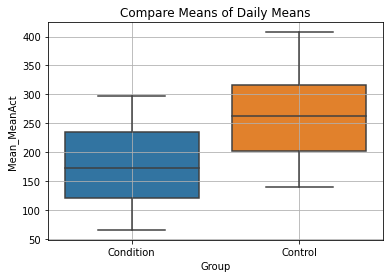

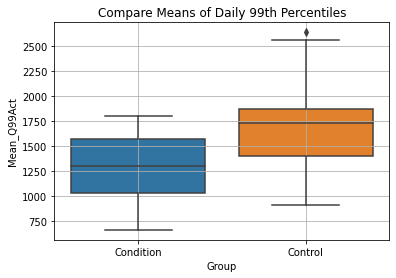

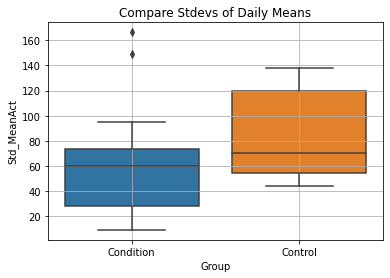

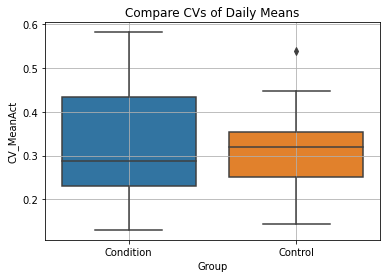

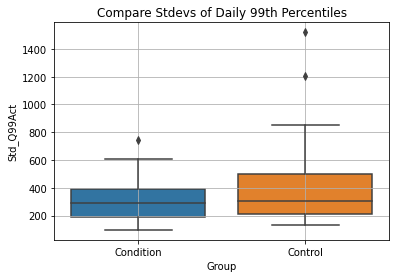

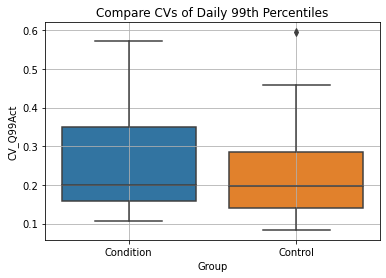

In [126]:
# compare means of daily means for the two groups
sns.boxplot(data=combined_stats, x='Group', y='Mean_MeanAct')
plt.title('Compare Means of Daily Means')
plt.grid()
plt.show()

# compare means of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='Mean_Q99Act')
plt.title('Compare Means of Daily 99th Percentiles')
plt.grid()
plt.show()

# compare stdevs of daily means
sns.boxplot(data=combined_stats, x='Group', y='Std_MeanAct')
plt.title('Compare Stdevs of Daily Means')
plt.grid()
plt.show()

# compare CVs of daily means
sns.boxplot(data=combined_stats, x='Group', y='CV_MeanAct')
plt.title('Compare CVs of Daily Means')
plt.grid()
plt.show()

# compare stdevs of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='Std_Q99Act')
plt.title('Compare Stdevs of Daily 99th Percentiles')
plt.grid()
plt.show()

# compare CVs of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='CV_Q99Act')
plt.title('Compare CVs of Daily 99th Percentiles')
plt.grid()
plt.show()

### Look at individual observations:

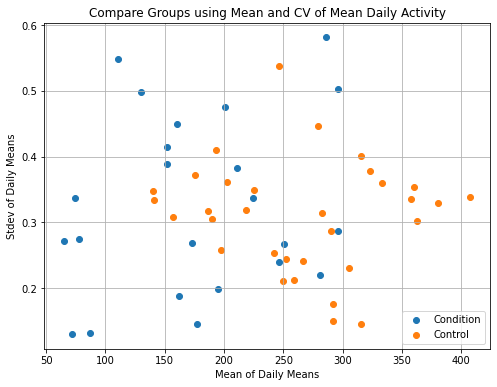

In [127]:
# compare two groups using scatter plot
plt.figure(figsize=(8,6))
plt.scatter(condition_stats.Mean_MeanAct, condition_stats.CV_MeanAct, label='Condition')
plt.scatter(control_stats.Mean_MeanAct, control_stats.CV_MeanAct, label='Control')
plt.legend(loc='lower right')
plt.xlabel('Mean of Daily Means')
plt.ylabel('Stdev of Daily Means')
plt.title('Compare Groups using Mean and CV of Mean Daily Activity')
plt.grid()
plt.show()

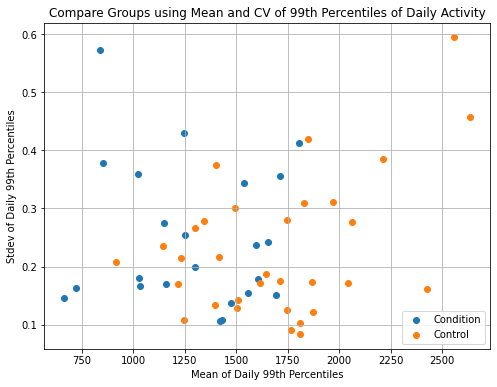

In [128]:
# compare two groups using scatter plot - now use quantile based metrics
plt.figure(figsize=(8,6))
plt.scatter(condition_stats.Mean_Q99Act, condition_stats.CV_Q99Act, label='Condition')
plt.scatter(control_stats.Mean_Q99Act, control_stats.CV_Q99Act, label='Control')
plt.legend(loc='lower right')
plt.xlabel('Mean of Daily 99th Percentiles')
plt.ylabel('Stdev of Daily 99th Percentiles')
plt.title('Compare Groups using Mean and CV of 99th Percentiles of Daily Activity')
plt.grid()
plt.show()

In [129]:
# interactive plot using additional "quantile" dimension
fig = px.scatter_3d(combined_stats, x='Mean_MeanAct', y='Std_MeanAct', z='CV_Q99Act',
                    color='Group',
                    hover_data=['number'],
                    opacity=0.5)
fig.update_layout(title='Compare Groups using Mean/Stdev of Mean Daily Activity and CV of Daily 99th Perc.')
fig.show()

#### Does afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I) make a difference within the condition group?

In [130]:
# add stats to original data frame (condition group) to get access to all features
df_condition_x = pd.concat([df_condition, condition_stats.drop('number', axis=1)], axis=1)
df_condition_x = df_condition_x.drop('Group', axis=1)
df_condition_x.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0,152.199630,1248.365333,59.218240,537.750628,0.389083,0.430764
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,-13.0,211.280738,1538.777368,80.924414,528.810407,0.383018,0.343656
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,1.0,280.810714,1605.270000,61.577770,287.349708,0.219286,0.179004
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,-4.0,286.064732,1710.240714,166.280241,609.340002,0.581268,0.356289
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0,172.622371,1300.538571,46.444164,259.816491,0.269051,0.199776


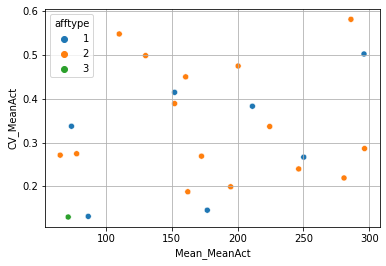

In [131]:
# scatterplot, show afftype via color
sns.scatterplot(data=df_condition_x,
                x='Mean_MeanAct', y='CV_MeanAct',
                hue='afftype')
plt.grid()
plt.show()

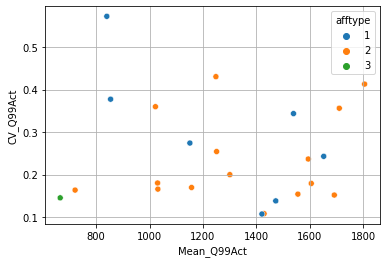

In [132]:
# scatterplot, show afftype via color
sns.scatterplot(data=df_condition_x,
                x='Mean_Q99Act', y='CV_Q99Act',
                hue='afftype')
plt.grid()
plt.show()

#### Ok, at least nothing obvious...

## For plots of all time series see the additional notebook https://www.kaggle.com/docxian/depression-and-motor-activity-all-plots